## Objective of this project

1. To **experiment with different classification methods** to see which yields the **highest accuracy**.
2. To **determine which features are the most indicative** of a good quality wine

## Dataset Description

**From UCL Machine Learning Repo**
- [Red Wine Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)
- [White Wine Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)

# Red wine dataset classification

## Importing Libraries

In [1]:
import numpy as np                # used to create numpy arrays
import pandas as pd               # pandas Library is used to create pandas dataframe which is very useful for data analyze and process the data
import matplotlib.pyplot as plt   # for plots and graphs
import seaborn as sns             # for data visualizing, making plots and graphs
from sklearn.model_selection import train_test_split, cross_val_score # used to split data into train and test. we won't split manually, rather use this library function
from sklearn.metrics import accuracy_score # to evaluate our model, how well our model is performing
import plotly.express as px
from sklearn.metrics import classification_report

## Loading Dataset From Drive

### Adding google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Collection

In [3]:
# loading dataset to a Pandas Dataframe
redwineDF = pd.read_csv('/content/drive/MyDrive/Machine Learning/DataSet/winequality-red.csv', delimiter= ';')

In [4]:
# number of rows and columns
print("(Rows, columns): " + str(redwineDF.shape)) # dataframe.shape

(Rows, columns): (1599, 12)


In [5]:
# printing first 5 rows of the dataset
redwineDF.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


So, we have total 12 column and 12th column is the label which defines quality of the wine. We will use other 11 columns to predict the quality of the wine.

In [6]:
# Checking for missing values
redwineDF.isnull().sum() # isnull return there are any missing values in columns and sum returns total no of missing values in each column

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So, we don't have any missing values in our dataset. If it was, we can
- mean the whole column values to fillup that cell.
- or drop that row

## Data Analysis and Visualization

Let's first get the statistical measures from dataset

In [7]:
redwineDF.describe() # f

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This is very helpful for visualising statistical measures. We have 1599 columns of fixed aciditiy, each column mean, std, minimum value, maximum value, 25% percentile values are less than 7.1 etc.

#### Histogram of **quality** variable

In [8]:
px.histogram(redwineDF, x='quality').show()

#### catplot of **quality** variable

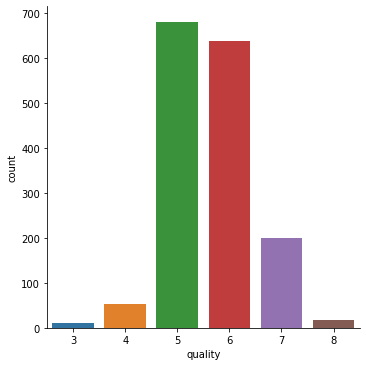

In [9]:
# number of values for each quality
sns.catplot(x = 'quality', data = redwineDF, kind='count')


We are getting quality values ranging from 3 to 6. Where most of the wine quality is avg(5,6, 7) and 8 means too good.

### More Analysis on which values related to quality

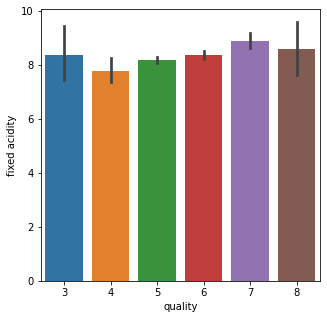

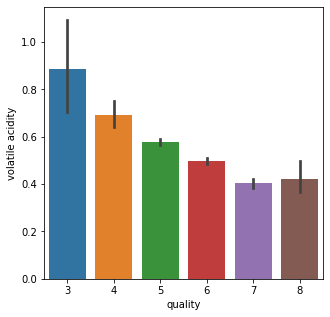

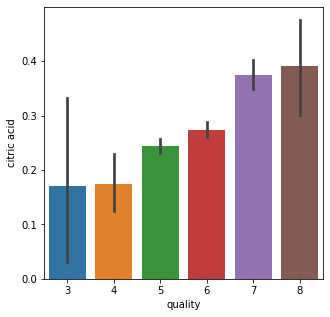

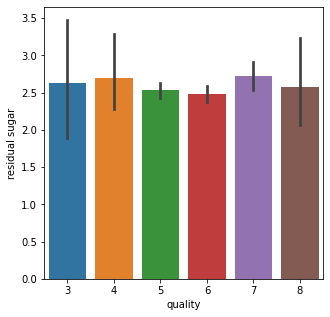

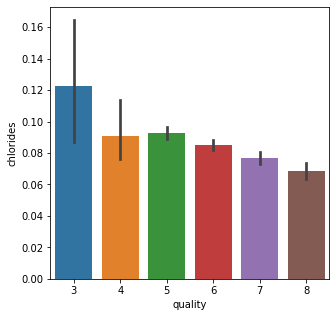

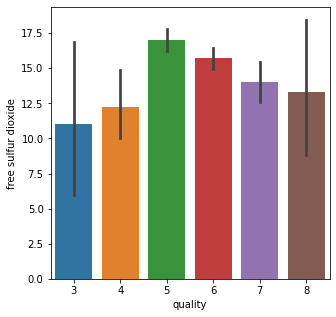

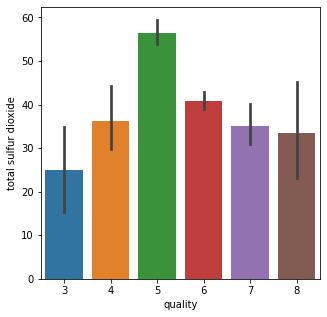

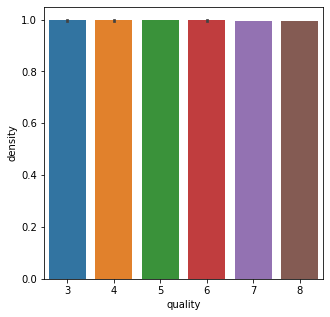

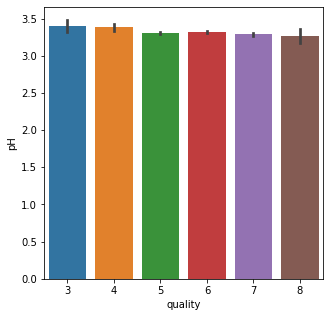

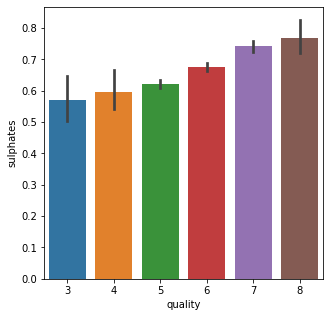

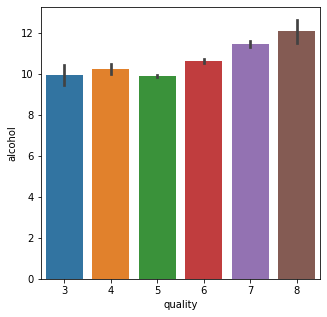

In [10]:
# fixed acidity vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwineDF) # creating barplot

# volatile acidity vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'volatile acidity', data = redwineDF) # creating barplot

# citric acid vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'citric acid', data = redwineDF) # creating barplot

# residual sugar vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'residual sugar', data = redwineDF) # creating barplot

# chlorides vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'chlorides', data = redwineDF) # creating barplot

# free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = redwineDF) # creating barplot

# total sulfur dioxide vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = redwineDF) # creating barplot

# density vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'density', data = redwineDF) # creating barplot

# pH vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'pH', data = redwineDF) # creating barplot

# sulphates vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'sulphates', data = redwineDF) # creating barplot

# alcohol vs Quality
plot = plt.figure(figsize=(5, 5)) 
sns.barplot(x = 'quality', y = 'alcohol', data = redwineDF) # creating barplot

### Correlation between all the columns and quality columns

It will allows as to get a much better understanding of the relationships between my variables in a quick glimpse.

There are 2 types of correlation
- Positive correlation: if two values are positively correlated means if increasing in one, also increases other. And vice versa. 
- Negative correlation: Oppositive, inverseley proportional

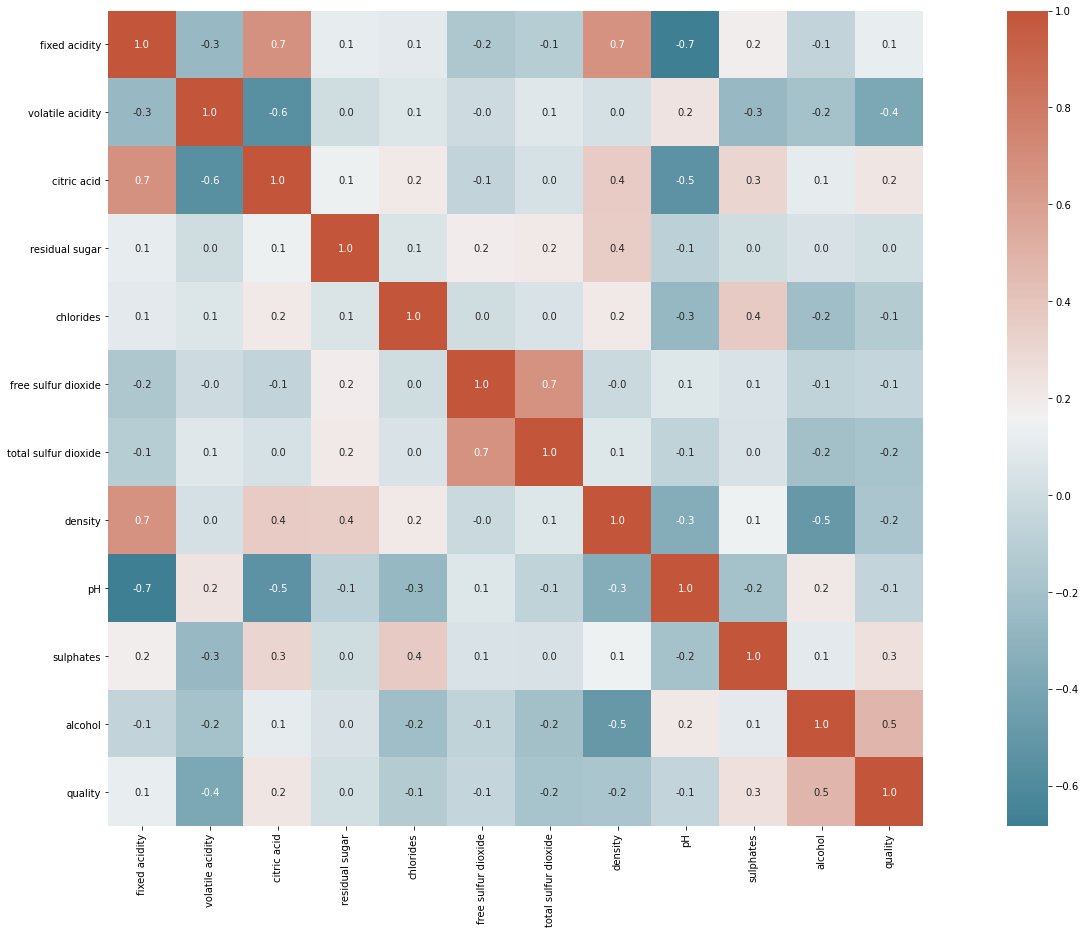

In [11]:
correlation = redwineDF.corr() # finding correlation values using .corr() and later we are applying it for our heatmap

# constructing a heat map to understand the correlation between the columns
plt.figure(figsize = (30, 15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# cbar means colorbar gives how much correlated the values are
# .1f means 1 value after decimal
# All of them are in square form
# annotations means fixed acidity ...
# annotations text size
# map color

Here we can see at quality column, volatile acidity is the most negtvly correlated and alchohole is the most positively correlated with quality column. 

## Data Preprocessing

In [12]:
# seperate the data and label i.e. all other columns from quality
X = redwineDF.drop('quality', axis=1) # axis 1 when dropping columns, and 0 when dropping rows
print(X) # printing feature variables

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

### Label Binarization/Encoding

So now, we will seperate our quality column as if quality `<7` is bad and Good otherwise

In [13]:
Y = redwineDF['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0) 
print(Y) # target varibales into 0 or 1

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Data Modeling

### Standardizing Feature Variables

 **Standardizing** the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. It’s important to standardize your data in order to equalize the range of the data.

In [14]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

## Model Training

In [15]:

from sklearn.preprocessing import StandardScaler


# Classify Function
def classify(model, X, y):
  
  # spliting dataset & train model
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2) # 20% test dataset
  model.fit(X_train, Y_train)
  
  # prediction and accuracy
  X_test_prediction = model.predict(X_test) # predict for X_test
  test_data_accuracy = accuracy_score(X_test_prediction, Y_test) # test data accuracy

  # cross-validation
  score = cross_val_score(model, X, y, cv=5)

  # print
  print("|------------|-----------------------|")
  print("|  Accuracy  |       " + str(test_data_accuracy*100) + "%           |")
  print("|  CV Score  |       " + str(np.round(np.mean(score)*100, 2)) + "%          |")
  print("|------------------------------------|")
  print("")
  # print("Accuracy: " + str(test_data_accuracy*100) + "%")
  # print("CV Score: " + str(np.round(np.mean(score)*100, 2)) + "%")
  print("|------------------------------------|")
  print("|   Printing Classification Report   |")
  print("|------------------------------------|")
  print("")
  print("")
  print(classification_report(Y_test, X_test_prediction))

## Model Evaluation (Classification Models Feeding)

#### Model 1: LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
reggressionModel = LogisticRegression()
classify(reggressionModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       89.0%           |
|  CV Score  |       86.74%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       347
           1       0.64      0.40      0.49        53

    accuracy                           0.89       400
   macro avg       0.77      0.68      0.71       400
weighted avg       0.88      0.89      0.88       400



#### Model 2: Decision Tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
decisionModel = DecisionTreeClassifier()
classify(decisionModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       85.0%           |
|  CV Score  |       79.92%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       347
           1       0.45      0.57      0.50        53

    accuracy                           0.85       400
   macro avg       0.69      0.73      0.71       400
weighted avg       0.87      0.85      0.86       400



#### Model 3: Random Forest Classifier

Random Forest Classifier is an ensemble model means this uses more than two models for prediction. RFC is a ensemble model of DT.

In [18]:
from sklearn.ensemble import RandomForestClassifier
forestModel = RandomForestClassifier()
classify(forestModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       91.25%           |
|  CV Score  |       86.99%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       347
           1       0.72      0.55      0.62        53

    accuracy                           0.91       400
   macro avg       0.83      0.76      0.79       400
weighted avg       0.91      0.91      0.91       400



#### Model 4: ExtraTreesClassifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
extraTreeModel = ExtraTreesClassifier()
classify(extraTreeModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       92.25%           |
|  CV Score  |       86.99%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       347
           1       0.84      0.51      0.64        53

    accuracy                           0.92       400
   macro avg       0.89      0.75      0.80       400
weighted avg       0.92      0.92      0.91       400



#### Model 5: XGBoost: XGBClassifier

In [20]:
import xgboost as xgb
xgbBoostModel = xgb.XGBClassifier()
classify(xgbBoostModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       88.25%           |
|  CV Score  |       86.18%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       347
           1       0.57      0.43      0.49        53

    accuracy                           0.88       400
   macro avg       0.75      0.69      0.71       400
weighted avg       0.87      0.88      0.88       400



#### Model 6: LGBMClassifier

In [21]:
import lightgbm
lightgbmModel = lightgbm.LGBMClassifier()
classify(lightgbmModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       92.0%           |
|  CV Score  |       86.74%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       347
           1       0.76      0.58      0.66        53

    accuracy                           0.92       400
   macro avg       0.85      0.78      0.81       400
weighted avg       0.91      0.92      0.92       400



#### Model 7: AdaBoost: AdaBoostClassifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostModel = AdaBoostClassifier()
classify(adaBoostModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       88.75%           |
|  CV Score  |       85.8%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.92      0.95      0.94       347
           1       0.59      0.49      0.54        53

    accuracy                           0.89       400
   macro avg       0.76      0.72      0.74       400
weighted avg       0.88      0.89      0.88       400



#### Model 8: Gradient Boosting: GradientBoostingClassifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoostModel = GradientBoostingClassifier()
classify(gradientBoostModel, X, Y)

|------------|-----------------------|
|  Accuracy  |       89.0%           |
|  CV Score  |       86.93%          |
|------------------------------------|

|------------------------------------|
|   Printing Classification Report   |
|------------------------------------|


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       347
           1       0.62      0.45      0.52        53

    accuracy                           0.89       400
   macro avg       0.77      0.70      0.73       400
weighted avg       0.88      0.89      0.88       400



By comparing all the classification models,
- Highest level of accuracy: LGBMClassifier, ExtraTreesClassifier, RandomForestClassifier. Though their accuracy doesn't differ much along with CV.
- Better f1-score for predicting Good Quality wines: LGBMClassifier

So, winner model: LGBMClassifier

## Building a Predictive System

In [24]:
# given all the values, our model will find its quality
input_data = [7.5,0.52,0.16,1.9,0.085,12,35,0.9968,3.38,0.62,9.5]
input_data_as_numpy_array = np.asarray(input_data) # converting the input data to a numpy array for data processing
input_data_reshapped = input_data_as_numpy_array.reshape(1, -1) # reshape the data as we are predicting the label for only one instance

prediction = lightgbmModel.predict(input_data_reshapped)

if prediction[0] == '1':
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")


Bad Quality Wine


## Feature Importance

### LightGBM

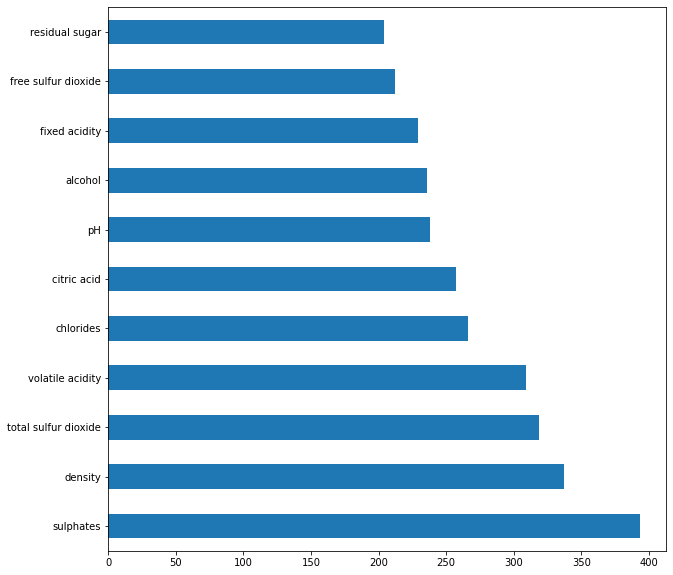

In [25]:
feat_importances = pd.Series(lightgbmModel.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

**Important Features:** sulphates, density, total sulfur dioxide, volatile acidity

### ExtraTreesClassifier

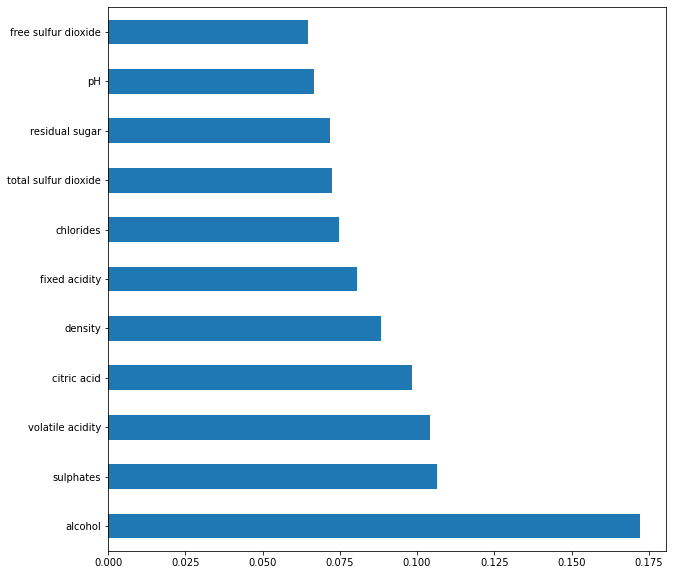

In [26]:
feat_importances = pd.Series(extraTreeModel.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

**Important Features:** alcohol, sulphates, volatile acidity, citric acid

### RandomForestClassifier

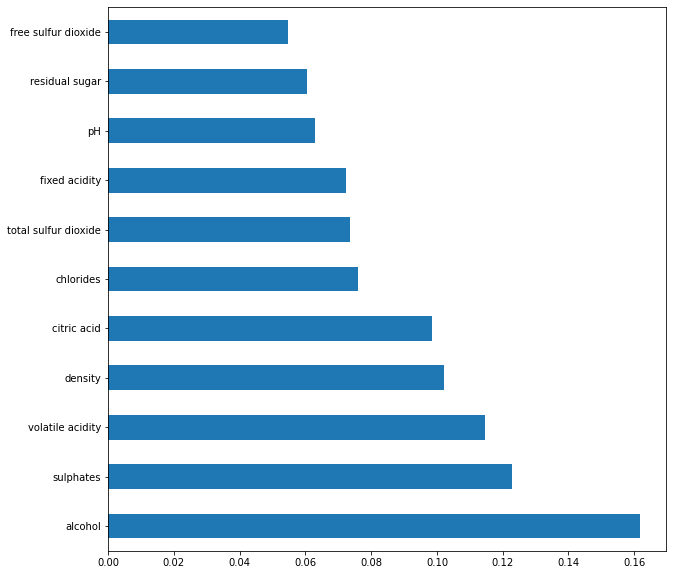

In [27]:
feat_importances = pd.Series(forestModel.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

**Important Features:** alcohol, sulphates, volatile acidity, density

### Analysing features finally

Important features considered:
- volatile acidity: 3
- sulphates: 3
- alcohol: 2
- density: 2 

In [28]:
good_quality_df = redwineDF.loc[redwineDF.quality >= 7]
good_quality_df[['volatile acidity', 'sulphates', 'density', 'alcohol', 'quality']].describe() # printing only important columns

,volatile acidity,sulphates,density,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.405530,0.743456,0.996030,11.518049,7.082949
std,0.144963,0.134038,0.002201,0.998153,0.276443
min,0.120000,0.390000,0.990640,9.200000,7.000000
25%,0.300000,0.650000,0.994700,10.800000,7.000000
50%,0.370000,0.740000,0.995720,11.600000,7.000000
75%,0.490000,0.820000,0.997350,12.200000,7.000000
max,0.915000,1.360000,1.003200,14.000000,8.000000


In [29]:
bad_quality_df = redwineDF.loc[redwineDF.quality <= 6]
bad_quality_df[['volatile acidity', 'sulphates', 'density', 'alcohol', 'quality']].describe() # printing only important columns

,volatile acidity,sulphates,density,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.547022,0.644754,0.996859,10.251037,5.408828
std,0.176337,0.170629,0.001808,0.969664,0.601719
min,0.160000,0.330000,0.990070,8.400000,3.000000
25%,0.420000,0.540000,0.995785,9.500000,5.000000
50%,0.540000,0.600000,0.996800,10.000000,5.000000
75%,0.650000,0.700000,0.997900,10.900000,6.000000
max,1.580000,2.000000,1.003690,14.900000,6.000000
